Note: you may need to restart the kernel to use updated packages.


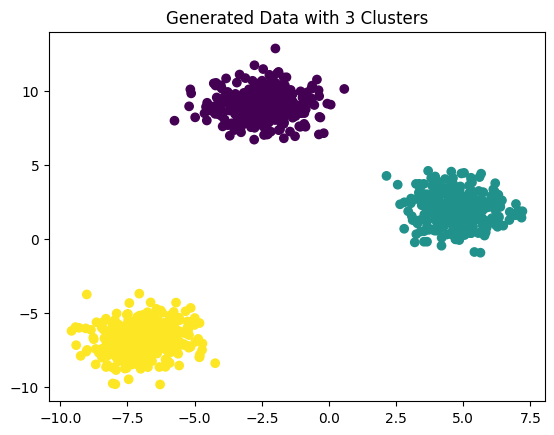

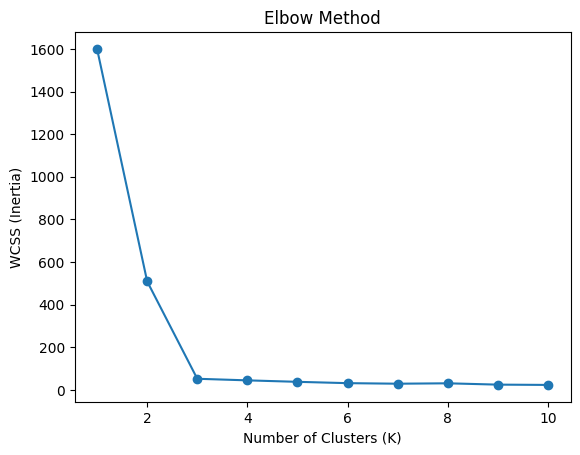

Best K (from Elbow method): 3


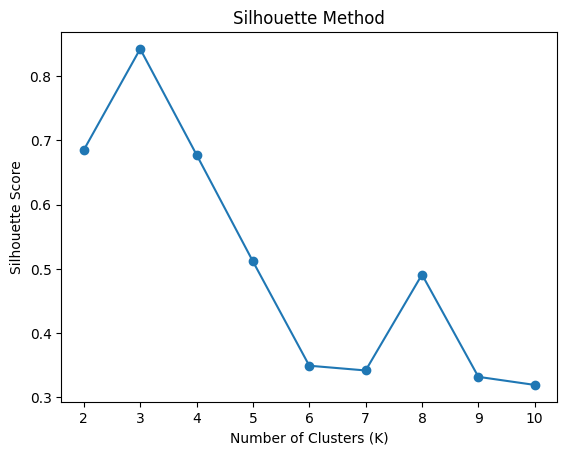

Best K (from Silhouette score): 3


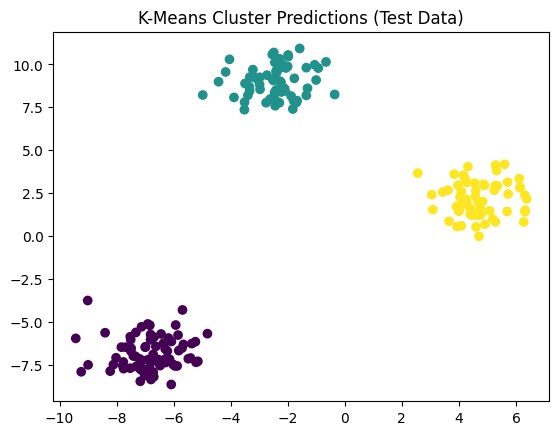

In [ ]:
# 🔧 Step 1: Import Libraries

%pip install kneed

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import pandas as pd
import numpy as np
# ✅ Why?
# •	make_blobs: to generate fake data (for testing).
# •	KMeans: to apply clustering.
# •	StandardScaler: to normalize data.
# •	KneeLocator and silhouette_score: for validating the number of clusters.
# •	matplotlib: for plotting.

# 🧪 Step 2: Generate Dummy Data (make_blobs)
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)
X
# 🔧 Step 1: Import Libraries

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from kneed import KneeLocator
import pandas as pd
import numpy as np
# ✅ Why?
# •	make_blobs: to generate fake data (for testing).
# •	KMeans: to apply clustering.
# •	StandardScaler: to normalize data.
# •	KneeLocator and silhouette_score: for validating the number of clusters.
# •	matplotlib: for plotting.

# 🧪 Step 2: Generate Dummy Data (make_blobs)
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)
X
# array([[-6.59633932, -7.13901457]])
y
# array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2])

# ✅ Why?
# •	We're simulating 1000 data points, with 2 features and 3 cluster centers.
# •	random_state ensures the same data every time you run it.

# 📊 Step 3: Visualize the Data

# X[:, 0]: selects all values from column 0 (x-axis values).
# X[:, 1]: selects all values from column 1 (y-axis values).
# c=y: colors each point based on its true cluster label (y, which is 0, 1, or 2).
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Generated Data with 3 Clusters")
plt.show()
# ✅ Why?
# •	Helps us visually confirm there are 3 clusters.
# •	This plot uses the true labels (y) — only for checking, not for model training.

# 📏 Step 4: Split the Data & Scale It
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Learns scale from training data & scales it
X_test_scaled = scaler.transform(X_test) # Applies same scaling to test data
# ✅ Why?
# •	We split the data into train and test (for later prediction).
# •	StandardScaler ensures all features are on the same scale — important for distance-based models like K-Means.

# 📈 Step 5: Use the Elbow Method to Choose K

wcss = [] # Initialize list to store WCSS(Within Cluster Sum of Squares) values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) #Create model for each k
    kmeans.fit(X_train_scaled) # Train model on scaled training data
    wcss.append(kmeans.inertia_) # Record WCSS for plotting

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.show()
# ✅ Why?
# •	The elbow method helps find the best k by checking where the WCSS (within-cluster sum of squares) drops sharply then flattens.
# •	The "elbow" point is often the optimal k.

# 🔍 Step 6: Automatically Detect Elbow with KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print("Best K (from Elbow method):", kl.elbow)
#Best K (from Elbow method): 3
# ✅ Why?
# •	Manually checking elbow can be subjective.
# •	KneeLocator automates the detection of the best k.

# | **Code**                                                                       | **Purpose**                                                                                                          
# | ------------------------------------------------------------------------------ | ----------------------------------------------------------------- 
# | `from kneed import KneeLocator`                                                | Imports the `KneeLocator` tool                                    
# | `kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')` | Creates a KneeLocator object using K values and their WCSS scores 
# | `curve='convex'`                                                               | Specifies the shape of the WCSS curve                             
# | `direction='decreasing'`                                                       | Tells KneeLocator the curve goes down as K increases              
# | `kl.elbow`                                                                     | Retrieves the best K (elbow point)                                
# | `print("Best K (from Elbow method):", kl.elbow)`                               | Displays the optimal number of clusters                           


# 📊 Step 7: Silhouette Score for More Validation
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

#We pick the highest value which is 3

# Best k based on max silhouette score
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print("Best K (from Silhouette score):", best_k)
# # Best K (from Silhouette score): 3
# ✅ Why?
# •	Silhouette Score measures how similar a point is to its own cluster vs other clusters.
# •	Higher is better (max = 1).
# •	Helps confirm elbow method results.

# ✅ Step 8: Fit Final KMeans Model

kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
train_labels = kmeans.fit_predict(X_train_scaled)
# ✅ Why?
# •	Now we use the best_k (usually 3) to train the final KMeans model.

# 🔮 Step 9: Predict Clusters for Test Data
test_labels = kmeans.predict(X_test_scaled)
# ✅ Why?
# •	Use trained model to assign clusters to new (test) data.

# 🎨 Step 10: Visualize Predicted Clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels)
plt.title("K-Means Cluster Predictions (Test Data)")
plt.show()



